In [43]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../../datasets/parsed_malt_data.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,location,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date
0,Mickael M.,https://dam.malt.com/ecrimpl92gqieb0ijvjo?grav...,Graphiste,-,250,1.00,Quelques jours,['Graphiste'],"['Wordpress', 'Design logo', 'Affiche', 'Carte...",0,"{'Localisation': '21000 Dijon, France'}","Passionné depuis mon enfance par le graphisme,...",0,0,0,mickaelmolina,https://www.malt.fr/profile/mickaelmolina,2013-08-02
1,Nacera TIZI,https://dam.malt.com/erokb7omnnhmf79bojnr?grav...,Commerciale Freelance,-,40,NaN,1h,['Business developers'],['Tanger et tout le Maroc'],0,"{'Localisation': 'Tanger, Tanger-Tétouan, Maroc'}",Parce que La ville de Tanger tend à devenir l'...,0,0,0,naceratizi,https://www.malt.fr/profile/naceratizi,2014-02-22
2,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,"{'Localisation': 'La Rochelle, France'}",SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06
3,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,"{'Localisation': 'Paris, France'}","Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18
4,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,"{'Localisation': 'Paris, France / www.graphicf...","Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193171,Lydia Ronné,https://dam.malt.com/0ab661d5-23a2-4a9a-a3a7-2...,assistante virtuelle,15et+,200,1.00,1h,['Planneur Stratégique'],"['Construction', 'Commerce de gros', 'Services...",0,"{'Localisation': 'Choisy-le-Roi, France'}",Je suis spécialisée dans l'assistance et le co...,0,0,0,lydiaronne,https://www.malt.fr/profile/lydiaronne,2023-10-12
193172,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,"{'Localisation': 'Lille, France'}",Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01
193173,Tony Marando,https://dam.malt.com/d2b7425b-8633-4c1c-8e3b-f...,Traducteur,0-2,125,1.00,1h,"['Community Manager', 'Traducteur']","['Traduction Français Anglais', 'Traduction An...",0,"{'Localisation': 'Collonges-sous-Salève, France'}",Hello !Je suis Tony et l’admin du groupe Plans...,0,0,0,tonymarando,https://www.malt.fr/profile/tonymarando,2023-10-26
193174,Matthieu Sager,https://dam.malt.com/c7e64455-efbf-4ec7-ad3e-1...,Ingénieur système,3-7,450,1.00,1h,['Designer Produit Industriel'],"['Industrie électrique', 'Environnement et dév...",0,"{'Localisation': 'Poitiers, France'}",Fort de mes 5 années d'expérience dans le déve...,0,0,0,matthieusager,https://www.malt.fr/profile/matthieusager,2023-10-14


### CATEGORIES OF FREELANCERS

TOP 5 categories that get the best salary: is there a best category to be in (salary, length of mission?)

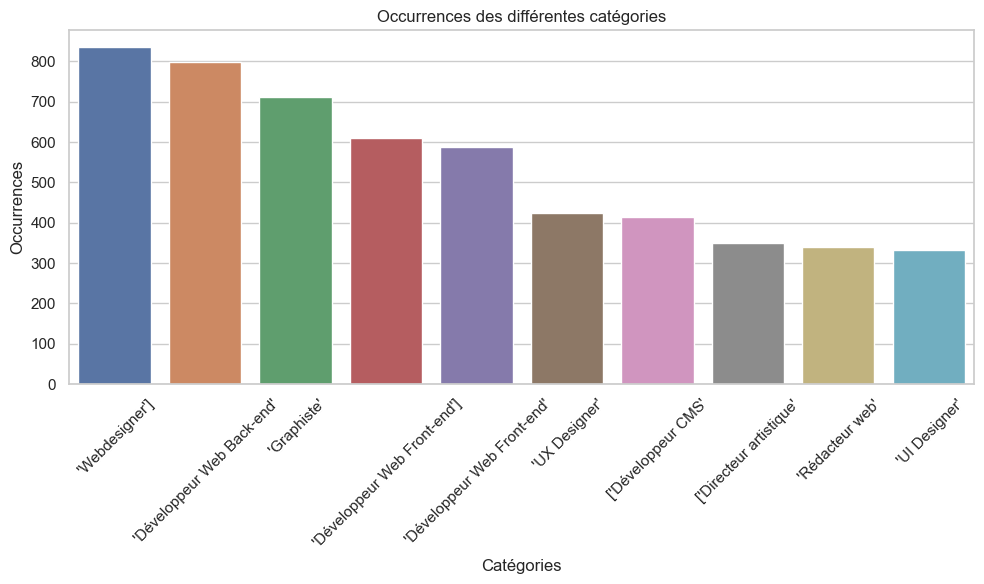

In [44]:
# Get the value counts of the different types of categories in the dataset and plot them
df = df[df['missions'] != 0]
df = df[df['categories'].apply(lambda x: isinstance(x, str) and x != '')]

# Diviser les valeurs de 'categories' en listes
df['categories'] = df['categories'].apply(lambda x: x.split(','))

# Appliquer explode pour obtenir une ligne par catégorie
df_exploded = df.explode('categories')

# Compter les occurrences des catégories
category_counts = df_exploded['categories'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Configuration de Seaborn pour afficher les graphiques dans le notebook
sns.set(style="whitegrid")
sns.set_context("notebook")

# limit to top 10 categories
category_counts = category_counts.head(10)

# Tracer un graphique à barres avec Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Catégories')
plt.ylabel('Occurrences')
plt.title('Occurrences des différentes catégories')
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
plt.tight_layout()
plt.show()

BEST 5 SKILLS to get in these top 5 categories

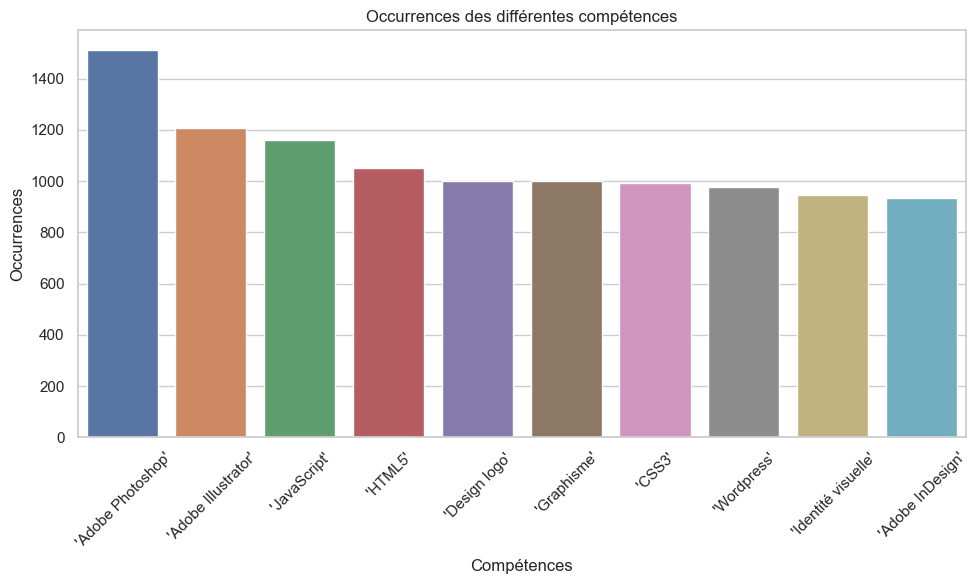

In [45]:
# plot top 5 best skills
df = df[df['skills'].apply(lambda x: isinstance(x, str) and x != '')]
df['skills'] = df['skills'].apply(lambda x: x.split(','))
df_exploded = df.explode('skills')

# count skill occurrences
skill_counts = df_exploded['skills'].value_counts().reset_index()
skill_counts.columns = ['Skill', 'Count']

# limit to top 5 skills
skill_counts = skill_counts.head(10)

# plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Skill', y='Count', data=skill_counts)
plt.xlabel('Compétences')
plt.ylabel('Occurrences')
plt.title('Occurrences des différentes compétences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()